In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
URL = "https://learnenough.s3.amazonaws.com/titanic.csv"
titanic = pd.read_csv(URL)

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic = pd.read_csv(URL, index_col="Name")
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic["Survived"].mean()

0.3838383838383838

In [6]:
titanic["Pclass"].unique()

array([3, 1, 2])

In [7]:
titanic.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

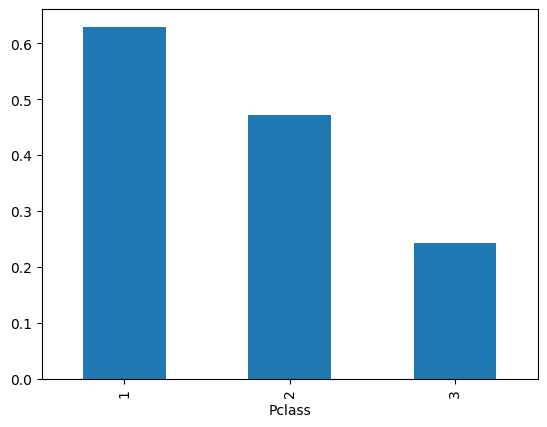

In [8]:
survival_rates = titanic.groupby("Pclass")["Survived"].mean()
survival_rates.plot.bar()
plt.show()

In [9]:
titanic["Sex"].unique()

array(['male', 'female'], dtype=object)

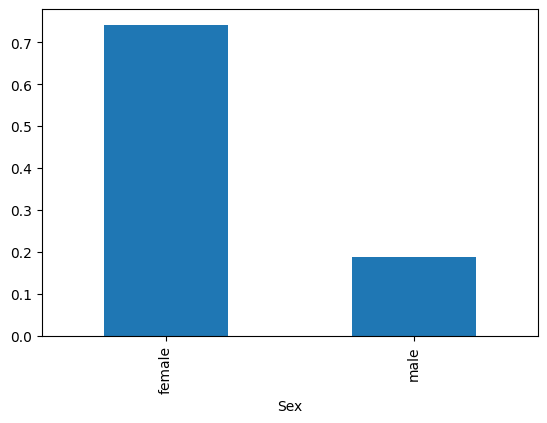

In [10]:
survival_rates = titanic.groupby("Sex")["Survived"].mean()
survival_rates.plot.bar()
plt.subplots_adjust(bottom=0.20)
plt.show()


In [13]:
titanic["Age"].min()

0.42

In [14]:
titanic["Age"].max()

80.0

In [15]:
(titanic["Age"].max() - titanic["Age"].min())/7

11.368571428571428

In [16]:
titanic["Age"].notna()

Name
Braund, Mr. Owen Harris                                 True
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     True
Heikkinen, Miss. Laina                                  True
Futrelle, Mrs. Jacques Heath (Lily May Peel)            True
Allen, Mr. William Henry                                True
                                                       ...  
Montvila, Rev. Juozas                                   True
Graham, Miss. Margaret Edith                            True
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                   True
Dooley, Mr. Patrick                                     True
Name: Age, Length: 891, dtype: bool

In [17]:
valid_ages = titanic[titanic["Age"].notna()]

In [18]:
sorted_by_age = valid_ages.sort_values(by="Age")

In [19]:
sorted_by_age["Age range"] = pd.cut(sorted_by_age["Age"], 7)

In [21]:
survival_rates = sorted_by_age.groupby("Age range")["Survived"].mean()

Age range
(0.34, 11.789]      0.573529
(11.789, 23.157]    0.359551
(23.157, 34.526]    0.399142
(34.526, 45.894]    0.417910
(45.894, 57.263]    0.411765
(57.263, 68.631]    0.346154
(68.631, 80.0]      0.142857
Name: Survived, dtype: float64

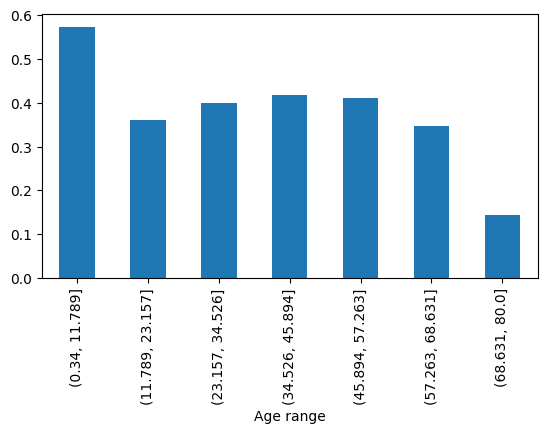

In [22]:
survival_rates.plot.bar()
plt.subplots_adjust(bottom=0.33)
plt.show()

In [23]:
titanic[titanic["Sex"] == "male"]["Age"].mean()

30.72664459161148

In [24]:
titanic[titanic["Sex"] == "female"]["Age"].mean()

27.915708812260537

In [27]:
titanic[(titanic["Sex"] == "female") &
        (titanic["Pclass"] == 3)]["Survived"].mean()

0.5

In [28]:
titanic[(titanic["Sex"] == "male") &
        (titanic["Pclass"] == 3)]["Survived"].mean()

0.13544668587896252

In [35]:
male_passengers = titanic[titanic["Sex"] == "male"]
valid_male_ages = male_passengers[titanic["Age"].notna()]

/var/folders/8p/rr5d_f812nsgqzfsf59sxwrm0000gn/T/ipykernel_10576/2568292174.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  valid_male_ages = male_passengers[titanic["Age"].notna()]


In [37]:
sorted_by_age = valid_male_ages.sort_values(by="Age")
sorted_by_age["Valid male age range"] = pd.cut(sorted_by_age["Age"], 7)
survival_rates = sorted_by_age.groupby("Valid male age range")["Survived"].mean()

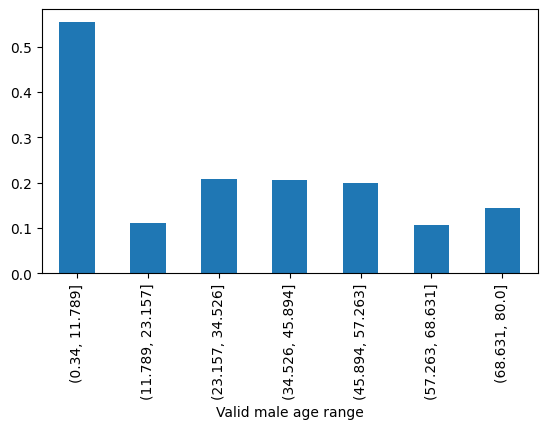

In [38]:
survival_rates.plot.bar()
plt.subplots_adjust(bottom=0.33)
plt.show()

In [39]:
female_passengers = titanic[titanic["Sex"] == "female"]
valid_female_ages = female_passengers[titanic["Age"].notna()]

/var/folders/8p/rr5d_f812nsgqzfsf59sxwrm0000gn/T/ipykernel_10576/845578031.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  valid_female_ages = female_passengers[titanic["Age"].notna()]


In [40]:
sorted_by_age = valid_female_ages.sort_values(by="Age")
sorted_by_age["Valid female age range"] = pd.cut(sorted_by_age["Age"], 7)
survival_rates = sorted_by_age.groupby("Valid female age range")["Survived"].mean()

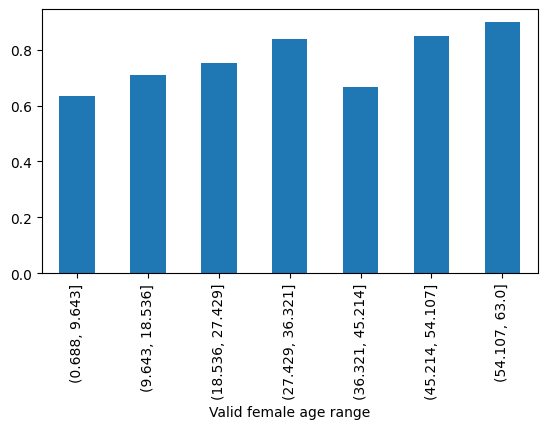

In [41]:
survival_rates.plot.bar()
plt.subplots_adjust(bottom=0.33)
plt.show()